## 1. 데이터 전처리

In [ ]:
참조 코드 : https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/18.%20Fine-tuning%20BERT%20(Cls%2C%20NER%2C%20NLI)/18-4.%20kor_bert_nsmc_model_from_transformers_gpu.ipynb

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/noname__project/230920 GPU 활용 모델링/Input 데이터(final_fooddata + 역번역데이터 합본).csv")
data = data.rename(columns={'메뉴명':"menu", '설명':"content"})
data = data[['menu', 'content']]

In [ ]:
data

,menu,content
0,갈비찜,소갈비를 이용한 한국 요리
1,갈비찜,명절이나 잔칫상에 올라가는 음식이다
2,갈비찜,이것 또한 밥도둑 반찬이며 입맛이 없을때 먹기 좋은 음식이다.
3,갈비찜,추석이나 설날에 먹는 한국적인 음식!
4,갈비찜,"매운양념, 안 매운 양념 다 맛있어요,,"
...,...,...
4288,훠궈,중국에서 가장 인기 있는 외식 메뉴입니다.
4289,훠궈,중국에서 가장 인기 있는 외식 요리
4290,훠궈,중국에서 가장 인기 있는 외식 음식
4291,훠궈,한국에서도 발견되며 마랑탕과 매우 유사합니다.


In [ ]:
# 레이블 가나다 순 정렬
data =data.sort_values(by=['menu'])
data =data.reset_index(drop=True)
data

,menu,content
0,갈비찜,소갈비를 이용한 한국 요리
1,갈비찜,하지만 소득 수준이 높아지고 한우보다 저렴한 수입육이 많아지면서 예전보다 가격이 많...
2,갈비찜,어떻게 만들든 고기가 진실입니다.
3,갈비찜,어떻게 만들든 고기가 진리입니다.
4,갈비찜,어떻게 만들든 고기는 진리입니다.
...,...,...
4288,훠궈,국물이 탁하고 진합니다.
4289,훠궈,국물이 흐리고 진합니다.
4290,훠궈,중국 북경과 사천 요리의 일종인 이 요리는 소고기나 양고기를 꼬치에 꽂아 육수에 담...
4291,훠궈,"매운맛/담백한 맛에 따라 색은 붉은색 또는 뽀얀 흰색을 내며 중국어로는 홍탕, 청탕..."


In [ ]:
# 결측치 확인
data.info()

NameError: ignored

In [ ]:
# 나무위키 특유의 [숫자] 주석을 제거하자
data['content'] = data["content"].replace(r'\[[0-9]+\]', "", regex=True)

In [ ]:
#xa0 문자 제거
data['content'] = data['content'].str.replace('\xa0', ' ')
data['content']

0                                          소갈비를 이용한 한국 요리
1       하지만 소득 수준이 높아지고 한우보다 저렴한 수입육이 많아지면서 예전보다 가격이 많...
2                                      어떻게 만들든 고기가 진실입니다.
3                                      어떻게 만들든 고기가 진리입니다.
4                                      어떻게 만들든 고기는 진리입니다.
                              ...                        
4288                                        국물이 탁하고 진합니다.
4289                                        국물이 흐리고 진합니다.
4290    중국 북경과 사천 요리의 일종인 이 요리는 소고기나 양고기를 꼬치에 꽂아 육수에 담...
4291    매운맛/담백한 맛에 따라 색은 붉은색 또는 뽀얀 흰색을 내며 중국어로는 홍탕, 청탕...
4292    백탕은 고기나 야채로 만든 맑은 국물이고, 홍탕은 두부와 초리조, 고추기름을 넣은 ...
Name: content, Length: 4293, dtype: object

In [ ]:
# 맨 앞 띄어쓰기 제거
data['content'] = data['content'].str.replace('^\s', '')

# 특수문자 제거
data['content'] = data['content'].str.replace('[\?\!\~\.\/]', ' ')


<ipython-input-13-a8f4f32a42be>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('^\s', '')
<ipython-input-13-a8f4f32a42be>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[\?\!\~\.\/]', ' ')


In [ ]:
data

,menu,content
0,갈비찜,소갈비를 이용한 한국 요리
1,갈비찜,하지만 소득 수준이 높아지고 한우보다 저렴한 수입육이 많아지면서 예전보다 가격이 많...
2,갈비찜,어떻게 만들든 고기가 진실입니다
3,갈비찜,어떻게 만들든 고기가 진리입니다
4,갈비찜,어떻게 만들든 고기는 진리입니다
...,...,...
4288,훠궈,국물이 탁하고 진합니다
4289,훠궈,국물이 흐리고 진합니다
4290,훠궈,중국 북경과 사천 요리의 일종인 이 요리는 소고기나 양고기를 꼬치에 꽂아 육수에 담...
4291,훠궈,"매운맛 담백한 맛에 따라 색은 붉은색 또는 뽀얀 흰색을 내며 중국어로는 홍탕, 청탕..."


In [ ]:
# 좌 우 공백 제거
def strip1(text):
    return text.lstrip(" ")
def strip2(text):
    return text.rstrip(" ")

data['content'] = data['content'].apply(strip1)
data['content'] = data['content'].apply(strip2)

In [ ]:
# label을 정수화

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(list(data['menu']))
data

,menu,content,label
0,갈비찜,소갈비를 이용한 한국 요리,0
1,갈비찜,하지만 소득 수준이 높아지고 한우보다 저렴한 수입육이 많아지면서 예전보다 가격이 많...,0
2,갈비찜,어떻게 만들든 고기가 진실입니다,0
3,갈비찜,어떻게 만들든 고기가 진리입니다,0
4,갈비찜,어떻게 만들든 고기는 진리입니다,0
...,...,...,...
4288,훠궈,국물이 탁하고 진합니다,152
4289,훠궈,국물이 흐리고 진합니다,152
4290,훠궈,중국 북경과 사천 요리의 일종인 이 요리는 소고기나 양고기를 꼬치에 꽂아 육수에 담...,152
4291,훠궈,"매운맛 담백한 맛에 따라 색은 붉은색 또는 뽀얀 흰색을 내며 중국어로는 홍탕, 청탕...",152


In [ ]:
data.to_csv('preprocessed_input.csv', encoding='cp949')

<Axes: >

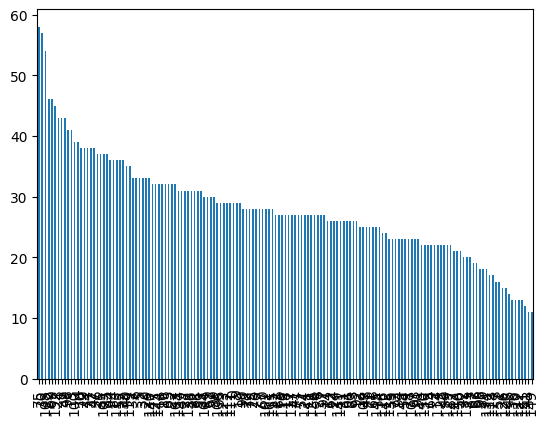

In [ ]:
# 레이블별 갯수 그래프화
data['label'].value_counts().plot(kind='bar')

## 2. 문장 토큰화 및 정수 인코딩

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.5 MB/s eta 0:00:00


In [ ]:
import transformers
transformers.__version__

'4.33.2'

In [ ]:
# 토크나이저 불러오기

from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('klue/bert-base')

In [ ]:
# 가짜 validation data (없으면 코드가 안돌아가서..)
test_data = pd.DataFrame({"label":[1, 2, 3, 4], "content":["z", "d", "d", "f"]})
test_data

,label,content
0,1,z
1,2,d
2,3,d
3,4,f


In [ ]:
# 학습용 자료 준비 (validation용 데이터는 없으면 코드가 안돌아가서 그냥 가짜로 만듦)
X_train_list = data['content'].tolist()
y_train = data['label'].tolist()
X_test_list = test_data['content'].tolist()
y_test = test_data['label'].tolist()

In [ ]:
# 문장들을 토큰화 및 패딩
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [ ]:
# attention mask 확인
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 3. 데이터셋 생성 및 모델 학습

In [ ]:
# 컨텐츠/레이블로 구성된 데이터셋 준비
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices(
    (dict(X_train), y_train)
)

val_dataset = tf.data.Dataset.from_tensor_slices(
    (dict(X_test), y_test)
)

In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 모델 준비
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=153, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 옵티마이저 준비
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# 모델 컴파일
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=153, from_pt=True)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# callback_earlystop = EarlyStopping(
#     monitor="accuracy",      # val_accuracy 값의 개선이
#     patience=2,             # 2 epoch에 걸쳐 이뤄지지 않는 경우 학습을 조기 종료시킨다.
#     min_delta=0.001         # 0.001 이상 변화하지 않으면 개선되지 않는 것으로 봄
#     )

model.fit(train_dataset.shuffle(10000).batch(32), epochs=30, batch_size=64,
          validation_data = val_dataset.shuffle(10000).batch(1))

Epoch 1/30
135/135 [==============================] - 159s 699ms/step - loss: 4.8599 - accuracy: 0.0566 - val_loss: 5.3276 - val_accuracy: 0.0000e+00
Epoch 2/30
135/135 [==============================] - 90s 666ms/step - loss: 3.8397 - accuracy: 0.4258 - val_loss: 5.5407 - val_accuracy: 0.0000e+00
Epoch 3/30
135/135 [==============================] - 86s 639ms/step - loss: 2.6332 - accuracy: 0.7284 - val_loss: 5.5009 - val_accuracy: 0.0000e+00
Epoch 4/30
135/135 [==============================] - 86s 635ms/step - loss: 1.5682 - accuracy: 0.8775 - val_loss: 5.7027 - val_accuracy: 0.0000e+00
Epoch 5/30
135/135 [==============================] - 86s 636ms/step - loss: 0.8359 - accuracy: 0.9464 - val_loss: 5.7124 - val_accuracy: 0.0000e+00
Epoch 6/30
135/135 [==============================] - 85s 632ms/step - loss: 0.4436 - accuracy: 0.9697 - val_loss: 6.0071 - val_accuracy: 0.0000e+00
Epoch 7/30
135/135 [==============================] - 86s 634ms/step - loss: 0.2646 - accuracy: 0.9720 - 

## 4. 모델 저장

In [ ]:
# 모델 저장
model.save_pretrained('0920GPUbert')
tokenizer.save_pretrained('0920GPUbert')

('0920GPUbert/tokenizer_config.json',
 '0920GPUbert/special_tokens_map.json',
 '0920GPUbert/vocab.txt',
 '0920GPUbert/added_tokens.json',
 '0920GPUbert/tokenizer.json')

## 5. 모델 불러오기 및 테스트

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.3 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertForSequenceClassification
from transformers import TextClassificationPipeline
import tensorflow as tf
import tensorflow as tf
import pandas as pd

# 모델 불러오기
loaded_tokenizer = BertTokenizerFast.from_pretrained('0920GPUbert') # 여기 모델 주소 입력
loaded_model = TFBertForSequenceClassification.from_pretrained('0920GPUbert') # 여기 모델 주소 입력

text_classifier = TextClassificationPipeline(tokenizer=loaded_tokenizer,
                                              model=loaded_model,
                                              framework='tf',
                                              return_all_scores=True)

Some layers from the model checkpoint at 0920GPUbert were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at 0920GPUbert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:1

In [ ]:
# 입력문장 기반 메뉴 10개 추천해주는 함수 정의 (가장 점수 높은 메뉴가 맨 앞에 출력됨)
def recommend(input_sentence):

  score_list = [i['score'] for i in text_classifier(input_sentence)[0]]
  indices_of_max_values = np.argsort(score_list)[-10:][::-1]

  menu = []
  for i in indices_of_max_values:
    menu.append(data[data['label'] == i].iloc[0]['menu'])
  return menu

In [ ]:
recommend("졸업식날 먹기 좋은 음식은 뭐야")

['짜장면', '김밥', '돈가스', '덮밥', '볶음밥', '제육볶음', '김치전', '감자전', '라볶이', '생선구이']

In [ ]:
recommend("치킨 말고 다른 튀긴 기름진 음식 추천해줘")

['닭껍질튀김', '깐풍기', '라조기', '치킨가스', '닭도리탕', '백숙', '해물탕', '족발', '치킨', '찜닭']

In [ ]:
recommend("비오는날 막걸리랑 먹기 좋은 음식 추천해줘")

['김치전', '파전', '덮밥', '해물파전', '빈대떡', '감자전', '감바스', '삼겹살', '오뎅', '꼬치']

In [ ]:
 recommend("된장찌개 빼고 찌개요리 추천해줘")

['김치찌개', '내장탕', '돼지불고기', '콩나물국밥', '김치찜', '설렁탕', '청국장', '순두부', '고등어구이', '리조또']

In [ ]:
recommend("백숙 말고 다른 닭 요리 추천해줘")

['삼계탕', '깐풍기', '닭도리탕', '찜닭', '백숙', '라조기', '닭껍질튀김', '낙지볶음', '해물탕', '비빔국수']

In [ ]:
recommend("기분이 우울하고 비오는날 먹기 좋은 음식")

['파전', '감자전', '해물파전', '김치전', '연어', '잔치국수', '덮밥', '감바스', '해물탕', '메밀국수']

In [ ]:
recommend('초면인 팀원들과 먹을 점심 메뉴 추천해줘')

['김치찌개', '초밥', '난자완스', '생선구이', '순대국', '콩나물국밥', '제육볶음', '낙지볶음', '김치찜', '잔치국수']

In [ ]:
recommend('간식 먹고싶어 간식 추천해줘')

['빵', '토스트', '닭껍질튀김', '도토리묵', '족발', '추어탕', '죽', '호떡', '도가니탕', '보쌈']

In [ ]:
recommend('남자가 좋아하는 음식')

['돈가스', '순대국', '장어구이', '함박스테이크', '훠궈', '생선구이', '호떡', '김치찌개', '스파게티', '닭발']

In [ ]:
recommend('여자가 좋아하는 음식')

['훠궈', '돈가스', '닭발', '마라탕', '내장탕', '샤브샤브', '초밥', '커리', '순대', '어묵탕']

In [ ]:
recommend('어르신이 좋아하는 음식')

['함박스테이크', '호떡', '내장탕', '청국장', '김치찌개', '설렁탕', '김치찜', '콩나물국밥', '돌솥비빔밥', '족발']

In [ ]:
recommend('아이가 좋아하는 음식')

['함박스테이크', '치킨가스', '감바스', '닭도리탕', '탄탄면', '짜장밥', '내장탕', '마파두부', '김치찌개', '김치찜']

In [ ]:
recommend('햄버거나 피자 말고 기름진 거 추천해줘')

['치킨', '피자', '스테이크', '스파게티', '초밥', '햄버거', '생선구이', '연어', '물회', '돈가스']

In [ ]:
recommend('된장찌개 추천해줘')

['돼지불고기', '갈비탕', '곱창', '청국장', '잡채밥', '추어탕', '도가니탕', '내장탕', '볶음밥', '낙지볶음']